# USE THIS


In [1]:
from facenet_pytorch import InceptionResnetV1, MTCNN
import torch
from PIL import Image, ImageDraw
import cv2
import numpy as np
from IPython.display import Video, display

# Determine if an NVIDIA GPU is available
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Load the face recognition model
model = InceptionResnetV1(pretrained='vggface2').eval().to(device)
mtcnn = MTCNN(keep_all=True, device=device)  # Initialize MTCNN for face detection

# Load known faces from a single .pt file
known_faces_file = r'D:\Friend\Super AI\V89\My Project\facenet-pytorch-master\examples\embeddings_with_names.pt'  # Update the path
known_faces_data = torch.load(known_faces_file)  # Load embeddings

# Extract embeddings and names
known_face_embeddings = []
known_face_names = []
for name, embedding in known_faces_data.items():
    known_face_names.append(name)
    known_face_embeddings.append(embedding)

# Convert known_face_embeddings to a tensor
known_face_embeddings = torch.stack(known_face_embeddings).to(device)

# Function to recognize faces
def recognize_face(embedding, known_face_embeddings, known_face_names, threshold=1.5):
    distances = [torch.norm(embedding - known_face_embedding).item() for known_face_embedding in known_face_embeddings]
    min_distance_index = np.argmin(distances)
    if distances[min_distance_index] < threshold:
        return known_face_names[min_distance_index]
    return "Unknown"

# Open video file
video_path = '11.mp4'  # Path to your video file
cap = cv2.VideoCapture(video_path)
fps = int(cap.get(cv2.CAP_PROP_FPS))
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

frames_tracked = []
while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    # Convert frame to RGB and PIL image
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame_pil = Image.fromarray(frame_rgb)
    
    # Detect faces
    boxes, _ = mtcnn.detect(frame_pil)
    
    # Draw faces and names
    if boxes is not None:
        for box in boxes:
            # Convert box coordinates to integer
            box = box.astype(int)

            # Ensure the box coordinates are within the image boundaries
            box[0] = max(0, box[0])
            box[1] = max(0, box[1])
            box[2] = min(frame.shape[1], box[2])
            box[3] = min(frame.shape[0], box[3])

            # Draw rectangle around face using OpenCV
            cv2.rectangle(frame, (box[0], box[1]), (box[2], box[3]), (255, 0, 0), 2)

            # Get the face region for recognition
            face_region = frame_rgb[int(box[1]):int(box[3]), int(box[0]):int(box[2])]

            # Check if the face_region is valid before resizing
            if face_region.size == 0:
                print("Face region is empty, skipping this box.")
                continue

            face_region = cv2.resize(face_region, (160, 160))  # Resize for FaceNet
            face_tensor = torch.tensor(face_region).permute(2, 0, 1).float().unsqueeze(0).to(device) / 255.0
            
            # Get embedding and recognize
            with torch.no_grad():
                embedding = model(face_tensor).cpu()
                identity = recognize_face(embedding, known_face_embeddings, known_face_names)

            print(f"Identified: {identity}")
            
            # Draw name on the frame
            text_position = (int(box[0]), int(box[1]) - 10)  # Position to draw the name above the rectangle
            cv2.putText(frame, identity, text_position, cv2.FONT_HERSHEY_SIMPLEX,2.0, (255, 0, 0), 2, cv2.LINE_AA)

    # Resize frame for output
    frame_tracked = cv2.resize(frame, (640, 360))
    frames_tracked.append(frame_tracked)

cap.release()

# Save tracked video
out_video_path = 'video_tracked9.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Use 'mp4v' codec
video_tracked = cv2.VideoWriter(out_video_path, fourcc, fps, (640, 360))
for frame in frames_tracked:
    video_tracked.write(frame)
video_tracked.release()

# Display the tracked video
display(Video(out_video_path, width=640))


Identified: Noppawit Sabai
Identified: Akada Iamong
Identified: Akada Iamong
Identified: Akada Iamong
Identified: Noppawit Sabai
Identified: Akada Iamong
Identified: Akada Iamong
Identified: Akada Iamong
Identified: Akada Iamong
Identified: Akada Iamong
Identified: Akada Iamong
Identified: Akada Iamong
Identified: Akada Iamong
Identified: Akada Iamong
Identified: Akada Iamong
Identified: Akada Iamong
Identified: Akada Iamong
Identified: Noppawit Sabai
Identified: Akada Iamong
Identified: Noppawit Sabai
Identified: Noppawit Sabai
Identified: Noppawit Sabai
Identified: Noppawit Sabai
Identified: Phacharadanai Rossoda
Identified: Noppawit Sabai
Identified: Noppawit Sabai
Identified: Noppawit Sabai
Identified: Noppawit Sabai
Identified: Noppawit Sabai
Identified: Akada Iamong
Identified: Akada Iamong
Identified: Noppawit Sabai
Identified: Akada Iamong
Identified: Noppawit Sabai
Identified: Noppawit Sabai
Identified: Akada Iamong
Identified: Noppawit Sabai
Identified: Akada Iamong
Identifie

In [2]:
print(type(known_face_embeddings ))  # Should be a tensor or a list of tensors
print(known_face_embeddings )  # Inspect the contents


<class 'torch.Tensor'>
tensor([[ 0.0231,  0.0134,  0.0130,  ..., -0.0370,  0.0210, -0.0131],
        [ 0.0366,  0.0185, -0.0376,  ..., -0.0404,  0.0051,  0.0344],
        [ 0.0479, -0.0599, -0.0065,  ..., -0.0566, -0.0555, -0.0496],
        ...,
        [ 0.0089,  0.0657, -0.0312,  ..., -0.0924, -0.0087,  0.0364],
        [ 0.0165,  0.0052, -0.0548,  ..., -0.0742, -0.0020,  0.0363],
        [ 0.0408,  0.0083, -0.0044,  ..., -0.0150,  0.0886, -0.0104]])


In [3]:
import torch

# โหลดเทนเซอร์
tensor = torch.load(r'D:\Friend\Super AI\V89\My Project\facenet-pytorch-master\examples\embeddings_with_names.pt')
print(tensor)


{'Akada Iamong': tensor([ 2.3071e-02,  1.3431e-02,  1.2973e-02,  6.8957e-02,  6.7324e-02,
        -5.7180e-02, -1.1871e-03, -1.6905e-03, -4.2082e-02,  2.1825e-02,
         7.2212e-02, -5.1644e-03,  6.1092e-04, -1.3641e-02,  5.9417e-04,
         7.4760e-02, -1.9759e-02,  4.3334e-02, -7.3479e-02,  5.2557e-02,
         8.2745e-02,  2.7516e-02,  1.9825e-02,  4.4113e-03, -2.1407e-02,
         3.7242e-03,  6.5148e-02, -3.9564e-02, -4.4723e-03, -3.9259e-02,
         2.7115e-02,  5.2981e-02,  3.8913e-02,  1.1400e-02,  5.9182e-02,
        -2.9266e-02,  9.9822e-03, -9.8286e-02, -2.7789e-02,  1.7593e-02,
        -3.6901e-02,  2.9233e-02,  5.9069e-02, -5.1625e-02, -3.2677e-02,
         7.3154e-02, -7.7028e-03,  3.8911e-02, -5.1466e-02,  1.0625e-01,
         1.5736e-02, -5.4392e-02,  2.7493e-02, -1.2316e-02,  1.5368e-02,
        -7.6532e-02,  5.7179e-02, -4.6267e-02, -1.5066e-02,  1.9585e-03,
         4.6449e-03,  8.1050e-02, -1.4440e-02,  7.1571e-03,  4.4741e-03,
        -2.2246e-02, -3.8707e-02, 

In [4]:
known_face_names

['Akada Iamong',
 'Akaradej Sukchan',
 'Apiwat Rattanaphan',
 'Apiwit Buachan',
 'Ekapoj Suthiwong',
 'Nattawat Thakhamho',
 'Noppawit Sabai',
 'Panupong Sitthiprom',
 'Peerakarn Phraphinyokul',
 'Phacharadanai Rossoda',
 'Phuri Khamfei',
 'Phurin Rueannimit',
 'Sittikorn Thongdeenok',
 'Thanaphum Hengarun',
 'Thanapon Phetprapai',
 'Thanwa Suktham']

In [5]:
known_face_embeddings

tensor([[ 0.0231,  0.0134,  0.0130,  ..., -0.0370,  0.0210, -0.0131],
        [ 0.0366,  0.0185, -0.0376,  ..., -0.0404,  0.0051,  0.0344],
        [ 0.0479, -0.0599, -0.0065,  ..., -0.0566, -0.0555, -0.0496],
        ...,
        [ 0.0089,  0.0657, -0.0312,  ..., -0.0924, -0.0087,  0.0364],
        [ 0.0165,  0.0052, -0.0548,  ..., -0.0742, -0.0020,  0.0363],
        [ 0.0408,  0.0083, -0.0044,  ..., -0.0150,  0.0886, -0.0104]])

Identified: Sittikorn Thongdeenok


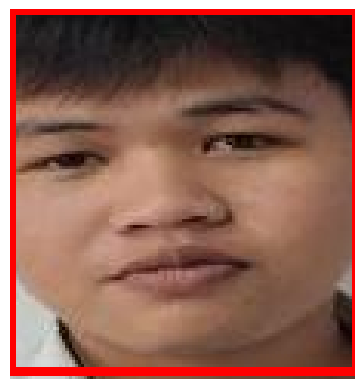

Accuracy: 100.00%


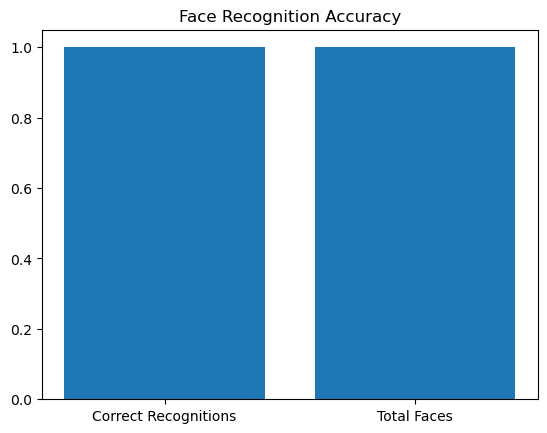

In [6]:
from facenet_pytorch import InceptionResnetV1, MTCNN
import torch
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Determine if an NVIDIA GPU is available
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Load the face recognition model
model = InceptionResnetV1(pretrained='vggface2').eval().to(device)
mtcnn = MTCNN(keep_all=True, device=device)  # Initialize MTCNN for face detection

# Load known faces from a single .pt file
known_faces_file = r'D:\Friend\Super AI\V89\My Project\facenet-pytorch-master\examples\embeddings_with_names.pt'  # Update the path
known_faces_data = torch.load(known_faces_file)  # Load embeddings

# Extract embeddings and names
known_face_embeddings = []
known_face_names = []
for name, embedding in known_faces_data.items():
    known_face_names.append(name)
    known_face_embeddings.append(embedding)

# Convert known_face_embeddings to a tensor
known_face_embeddings = torch.stack(known_face_embeddings).to(device)

# Function to recognize faces
def recognize_face(embedding, known_face_embeddings, known_face_names, threshold=1.5):
    distances = [torch.norm(embedding - known_face_embedding).item() for known_face_embedding in known_face_embeddings]
    min_distance_index = np.argmin(distances)
    if distances[min_distance_index] < threshold:
        return known_face_names[min_distance_index]
    return "Unknown"

# Load image file(s)
image_path = r'D:\Friend\Super AI\V89\My Project\facenet-pytorch-master\data\test_images_cropped\Apiwit Buachan\rotated_left_5_degrees_18_jpg.rf.df3bc28d02405cc6611fb1924224e91e_face_0.jpg'  # Path to your image file
image = Image.open(image_path)
image_rgb = np.array(image)

# Detect faces
boxes, _ = mtcnn.detect(image)

# Variables for plotting accuracy
total_faces = 0
correct_recognitions = 0

# Draw faces and names
if boxes is not None:
    for box in boxes:
        # Convert box coordinates to integer
        box = box.astype(int)

        # Ensure the box coordinates are within the image boundaries
        box[0] = max(0, box[0])
        box[1] = max(0, box[1])
        box[2] = min(image_rgb.shape[1], box[2])
        box[3] = min(image_rgb.shape[0], box[3])

        # Draw rectangle around face using OpenCV
        cv2.rectangle(image_rgb, (box[0], box[1]), (box[2], box[3]), (255, 0, 0), 2)

        # Get the face region for recognition
        face_region = image_rgb[int(box[1]):int(box[3]), int(box[0]):int(box[2])]

        # Check if the face_region is valid before resizing
        if face_region.size == 0:
            print("Face region is empty, skipping this box.")
            continue

        face_region = cv2.resize(face_region, (160, 160))  # Resize for FaceNet
        face_tensor = torch.tensor(face_region).permute(2, 0, 1).float().unsqueeze(0).to(device) / 255.0
        
        # Get embedding and recognize
        with torch.no_grad():
            embedding = model(face_tensor).cpu()
            identity = recognize_face(embedding, known_face_embeddings, known_face_names)

        print(f"Identified: {identity}")
        
        # Calculate recognition accuracy (assuming you know the ground truth)
        total_faces += 1
        if identity != "Unknown":
            correct_recognitions += 1
        
        # Draw name on the frame
        text_position = (int(box[0]), int(box[1]) - 10)  # Position to draw the name above the rectangle
        cv2.putText(image_rgb, identity, text_position, cv2.FONT_HERSHEY_SIMPLEX, 2.0, (255, 0, 0), 2, cv2.LINE_AA)

# Convert back to BGR for displaying using OpenCV
image_bgr = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR)

# Save the image with tracked faces
output_image_path = 'output_image.jpg'
cv2.imwrite(output_image_path, image_bgr)

# Display the output image
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

# Plot accuracy
if total_faces > 0:
    accuracy = correct_recognitions / total_faces
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Plotting accuracy as a bar chart
    plt.bar(['Correct Recognitions', 'Total Faces'], [correct_recognitions, total_faces])
    plt.title('Face Recognition Accuracy')
    plt.show()
else:
    print("No faces detected.")


Image: 5_jpg.rf.c12b78a4d0b671a903793f8e5a6e9cf8.jpg, Identified: Akada Iamong
Image: rotated_left_5_degrees_15_1_jpg.rf.8722450f693034497006f2d88632b73b.jpg, Identified: Ekapoj Suthiwong
Image: rotated_left_5_degrees_17_jpg.rf.cb98b3003bf2f3f05a39636a6da463ce.jpg, Identified: Phurin Rueannimit
Image: rotated_left_5_degrees_2_jpg.rf.4403551b984ff18785d90e8f6ca1689e.jpg, Identified: Thanaphum Hengarun
Image: rotated_right_5_degrees_10_jpg.rf.467ed5bcdc6eaa22c57e9ad57e105292.jpg, Identified: Thanapon Phetprapai
Overall Accuracy: 100.00%


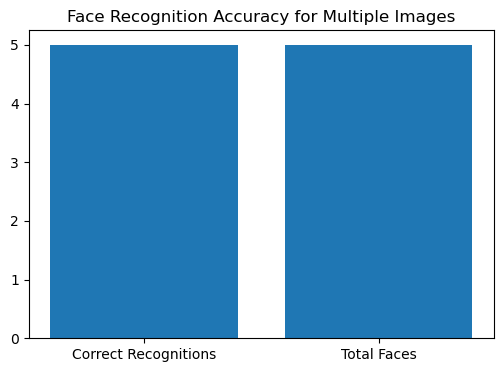

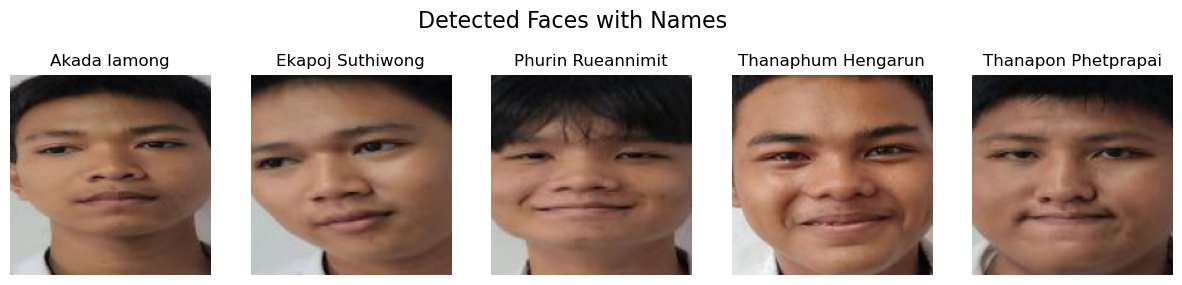

In [7]:
from facenet_pytorch import InceptionResnetV1, MTCNN
import torch
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Determine if an NVIDIA GPU is available
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Load the face recognition model
model = InceptionResnetV1(pretrained='vggface2').eval().to(device)
mtcnn = MTCNN(keep_all=True, device=device)  # Initialize MTCNN for face detection

# Load known faces from a single .pt file
known_faces_file = r'D:\Friend\Super AI\V89\My Project\facenet-pytorch-master\examples\embeddings_with_names.pt'  # Update the path
known_faces_data = torch.load(known_faces_file)  # Load embeddings

# Extract embeddings and names
known_face_embeddings = []
known_face_names = []
for name, embedding in known_faces_data.items():
    known_face_names.append(name)
    known_face_embeddings.append(embedding)

# Convert known_face_embeddings to a tensor
known_face_embeddings = torch.stack(known_face_embeddings).to(device)

# Function to recognize faces
def recognize_face(embedding, known_face_embeddings, known_face_names, threshold=1.0):
    distances = [torch.norm(embedding - known_face_embedding).item() for known_face_embedding in known_face_embeddings]
    min_distance_index = np.argmin(distances)
    if distances[min_distance_index] < threshold:
        return known_face_names[min_distance_index]
    return "Unknown"

# Path to the directory containing multiple images
image_directory = r'D:\Friend\Super AI\V89\My Project\facenet-pytorch-master\data\test'  # Update the path
image_files = [os.path.join(image_directory, f) for f in os.listdir(image_directory) if f.endswith('.jpg')]

# Variables for plotting accuracy
total_faces = 0
correct_recognitions = 0
detected_faces = []  # To store detected faces and their labels

# Process each image
for image_path in image_files:
    image = Image.open(image_path)
    image_rgb = np.array(image)

    # Detect faces
    boxes, _ = mtcnn.detect(image)

    # Draw faces and names
    if boxes is not None:
        for box in boxes:
            # Convert box coordinates to integer
            box = box.astype(int)

            # Ensure the box coordinates are within the image boundaries
            box[0] = max(0, box[0])
            box[1] = max(0, box[1])
            box[2] = min(image_rgb.shape[1], box[2])
            box[3] = min(image_rgb.shape[0], box[3])

            # Get the face region for recognition
            face_region = image_rgb[int(box[1]):int(box[3]), int(box[0]):int(box[2])]

            # Check if the face_region is valid before resizing
            if face_region.size == 0:
                print("Face region is empty, skipping this box.")
                continue

            face_region_resized = cv2.resize(face_region, (160, 160))  # Resize for FaceNet
            face_tensor = torch.tensor(face_region_resized).permute(2, 0, 1).float().unsqueeze(0).to(device) / 255.0
            
            # Get embedding and recognize
            with torch.no_grad():
                embedding = model(face_tensor).cpu()
                identity = recognize_face(embedding, known_face_embeddings, known_face_names)

            print(f"Image: {os.path.basename(image_path)}, Identified: {identity}")
            
            # Calculate recognition accuracy
            total_faces += 1
            if identity != "Unknown":
                correct_recognitions += 1

            # Store detected face and identity for plotting
            detected_faces.append((face_region_resized, identity))

# Plot accuracy after processing all images
if total_faces > 0:
    accuracy = correct_recognitions / total_faces
    print(f"Overall Accuracy: {accuracy * 100:.2f}%")

    # Plotting accuracy as a bar chart
    plt.figure(figsize=(6, 4))
    plt.bar(['Correct Recognitions', 'Total Faces'], [correct_recognitions, total_faces])
    plt.title('Face Recognition Accuracy for Multiple Images')
    plt.show()

    # Plot each detected face with the predicted name
    num_faces = len(detected_faces)
    cols = 5
    rows = (num_faces // cols) + 1
    plt.figure(figsize=(15, 3 * rows))

    for i, (face, identity) in enumerate(detected_faces):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(face)
        plt.title(identity)
        plt.axis('off')

    plt.suptitle('Detected Faces with Names', size=16)
    plt.show()

else:
    print("No faces detected in any of the images.")


100%|██████████| 21.5M/21.5M [00:18<00:00, 1.20MB/s]



0: 640x640 (no detections), 491.0ms
Speed: 8.1ms preprocess, 491.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 487.0ms
Speed: 6.0ms preprocess, 487.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 395.0ms
Speed: 8.0ms preprocess, 395.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Image: 15 (2).jpg, Identified: Unknown

0: 640x640 1 person, 396.8ms
Speed: 5.0ms preprocess, 396.8ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)
Image: 17.jpg, Identified: Apiwat Rattanaphan

0: 640x640 (no detections), 458.7ms
Speed: 7.0ms preprocess, 458.7ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 425.0ms
Speed: 4.0ms preprocess, 425.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 440.0ms
Speed: 7.0ms preprocess, 440.0ms inference, 3.0ms postprocess per image at shape (

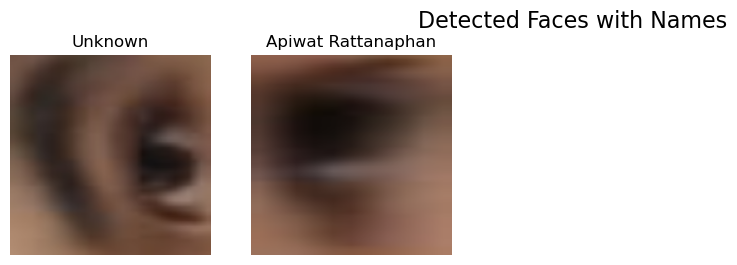

In [8]:
from facenet_pytorch import InceptionResnetV1
import torch
import cv2
import numpy as np
import os
from ultralytics import YOLO  # Import YOLO from ultralytics
from PIL import Image
import matplotlib.pyplot as plt

# Determine if an NVIDIA GPU is available
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Load FaceNet model
model = InceptionResnetV1(pretrained='vggface2').eval().to(device)

# Load known face embeddings
known_faces_file = r'D:\Friend\Super AI\V89\My Project\facenet-pytorch-master\examples\embeddings_with_names.pt'
known_faces_data = torch.load(known_faces_file)

# Extract embeddings and names
known_face_embeddings = []
known_face_names = []
for name, embedding in known_faces_data.items():
    known_face_names.append(name)
    known_face_embeddings.append(embedding)

# Convert known_face_embeddings to a tensor
known_face_embeddings = torch.stack(known_face_embeddings).to(device)

# Load YOLOv8 model for face detection
yolo_model = YOLO('yolov8s.pt')  # Load YOLO model (you can choose 'yolov8n' or another variant)

# Function to recognize faces
def recognize_face(embedding, known_face_embeddings, known_face_names, threshold=1.0):
    distances = [torch.norm(embedding - known_face_embedding).item() for known_face_embedding in known_face_embeddings]
    min_distance_index = np.argmin(distances)
    if distances[min_distance_index] < threshold:
        return known_face_names[min_distance_index]
    return "Unknown"

# Path to image directory
image_directory = r'D:\Friend\Super AI\V89\My Project\facenet-pytorch-master\data\test_images_cropped'
image_files = [os.path.join(image_directory, f) for f in os.listdir(image_directory) if f.endswith('.jpg')]

# Variables for tracking accuracy
total_faces = 0
correct_recognitions = 0
detected_faces = []

# Process each image
for image_path in image_files:
    image = Image.open(image_path).convert("RGB")
    image_rgb = np.array(image)

    # Use YOLO to detect faces
    results = yolo_model(image_rgb)
    boxes = results[0].boxes.xyxy.cpu().numpy() if results[0].boxes is not None else []

    # Process each detected face
    for box in boxes:
        box = box.astype(int)

        # Ensure the box coordinates are within the image boundaries
        box[0] = max(0, box[0])
        box[1] = max(0, box[1])
        box[2] = min(image_rgb.shape[1], box[2])
        box[3] = min(image_rgb.shape[0], box[3])

        # Extract face region
        face_region = image_rgb[box[1]:box[3], box[0]:box[2]]

        # Ensure the face region is not empty
        if face_region.size == 0:
            continue

        # Resize face region to 160x160 for FaceNet
        face_region_resized = cv2.resize(face_region, (160, 160))
        face_tensor = torch.tensor(face_region_resized).permute(2, 0, 1).float().unsqueeze(0).to(device) / 255.0

        # Generate embedding using FaceNet
        with torch.no_grad():
            embedding = model(face_tensor).cpu()

        # Recognize face
        identity = recognize_face(embedding, known_face_embeddings, known_face_names)

        # Display results
        print(f"Image: {os.path.basename(image_path)}, Identified: {identity}")

        # Update accuracy
        total_faces += 1
        if identity != "Unknown":
            correct_recognitions += 1

        # Store detected face and identity for plotting
        detected_faces.append((face_region_resized, identity))

# Plot accuracy
if total_faces > 0:
    accuracy = correct_recognitions / total_faces
    print(f"Overall Accuracy: {accuracy * 100:.2f}%")

    # Plotting detected faces and their labels
    num_faces = len(detected_faces)
    cols = 5
    rows = (num_faces // cols) + 1
    plt.figure(figsize=(15, 3 * rows))

    for i, (face, identity) in enumerate(detected_faces):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(face)
        plt.title(identity)
        plt.axis('off')

    plt.suptitle('Detected Faces with Names', size=16)
    plt.show()

else:
    print("No faces detected in any of the images.")



0: 640x640 (no detections), 880.0ms
Speed: 6.0ms preprocess, 880.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 828.0ms
Speed: 7.0ms preprocess, 828.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 812.8ms
Speed: 6.0ms preprocess, 812.8ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 927.0ms
Speed: 5.0ms preprocess, 927.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 955.5ms
Speed: 7.0ms preprocess, 955.5ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 955.0ms
Speed: 6.0ms preprocess, 955.0ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)
Image: 2 (2).jpg, Identified: Apiwat Rattanaphan

0: 640x640 (no detections), 835.0ms
Speed: 5.0ms preprocess, 835.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Overall Accur

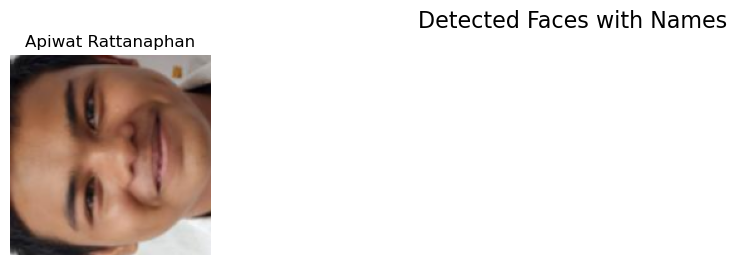

In [9]:
from facenet_pytorch import InceptionResnetV1
import torch
import cv2
import numpy as np
import os
from ultralytics import YOLO  # Import YOLO from ultralytics
from PIL import Image
import matplotlib.pyplot as plt

# Determine if an NVIDIA GPU is available
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Load FaceNet model
model = InceptionResnetV1(pretrained='vggface2').eval().to(device)

# Load known face embeddings
known_faces_file = r'D:\Friend\Super AI\V89\My Project\facenet-pytorch-master\examples\embeddings_with_names.pt'
known_faces_data = torch.load(known_faces_file)

# Extract embeddings and names
known_face_embeddings = []
known_face_names = []
for name, embedding in known_faces_data.items():
    known_face_names.append(name)
    known_face_embeddings.append(embedding)

# Convert known_face_embeddings to a tensor
known_face_embeddings = torch.stack(known_face_embeddings).to(device)

# Load YOLOv8 model for face detection
yolo_model = YOLO('yolov8m.pt')  # Load YOLO model (you can choose 'yolov8n' or another variant)

# Function to recognize faces
def recognize_face(embedding, known_face_embeddings, known_face_names, threshold=1.0):
    distances = [torch.norm(embedding - known_face_embedding).item() for known_face_embedding in known_face_embeddings]
    min_distance_index = np.argmin(distances)
    if distances[min_distance_index] < threshold:
        return known_face_names[min_distance_index]
    return "Unknown"

# Path to image directory
image_directory = r'D:\Friend\Super AI\V89\My Project\facenet-pytorch-master\data\test_images_cropped'
image_files = [os.path.join(image_directory, f) for f in os.listdir(image_directory) if f.endswith('.jpg')]

# Variables for tracking accuracy
total_faces = 0
correct_recognitions = 0
detected_faces = []

# Process each image
for image_path in image_files:
    image = Image.open(image_path).convert("RGB")
    image_rgb = np.array(image)

    # Use YOLO to detect faces
    results = yolo_model(image_rgb)
    boxes = results[0].boxes.xyxy.cpu().numpy() if results[0].boxes is not None else []

    # Process each detected face
    for box in boxes:
        box = box.astype(int)

        # Ensure the box coordinates are within the image boundaries
        box[0] = max(0, box[0])
        box[1] = max(0, box[1])
        box[2] = min(image_rgb.shape[1], box[2])
        box[3] = min(image_rgb.shape[0], box[3])

        # Extract face region
        face_region = image_rgb[box[1]:box[3], box[0]:box[2]]

        # Ensure the face region is not empty
        if face_region.size == 0:
            continue

        # Resize face region to 160x160 for FaceNet
        face_region_resized = cv2.resize(face_region, (160, 160))
        face_tensor = torch.tensor(face_region_resized).permute(2, 0, 1).float().unsqueeze(0).to(device) / 255.0

        # Generate embedding using FaceNet
        with torch.no_grad():
            embedding = model(face_tensor).cpu()

        # Recognize face
        identity = recognize_face(embedding, known_face_embeddings, known_face_names)

        # Display results
        print(f"Image: {os.path.basename(image_path)}, Identified: {identity}")

        # Update accuracy
        total_faces += 1
        if identity != "Unknown":
            correct_recognitions += 1

        # Store detected face and identity for plotting
        detected_faces.append((face_region_resized, identity))

# Plot accuracy
if total_faces > 0:
    accuracy = correct_recognitions / total_faces
    print(f"Overall Accuracy: {accuracy * 100:.2f}%")

    # Plotting detected faces and their labels
    num_faces = len(detected_faces)
    cols = 5
    rows = (num_faces // cols) + 1
    plt.figure(figsize=(15, 3 * rows))

    for i, (face, identity) in enumerate(detected_faces):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(face)
        plt.title(identity)
        plt.axis('off')

    plt.suptitle('Detected Faces with Names', size=16)
    plt.show()

else:
    print("No faces detected in any of the images.")


100%|██████████| 15.9M/15.9M [00:14<00:00, 1.13MB/s]



0: 640x640 (no detections), 478.0ms
Speed: 5.0ms preprocess, 478.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 498.6ms
Speed: 7.0ms preprocess, 498.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Image: 12.jpg, Identified: Apiwat Rattanaphan

0: 640x640 1 person, 522.0ms
Speed: 7.0ms preprocess, 522.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Image: 15 (2).jpg, Identified: Unknown

0: 640x640 1 person, 565.0ms
Speed: 8.0ms preprocess, 565.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Image: 17.jpg, Identified: Apiwat Rattanaphan

0: 640x640 (no detections), 550.8ms
Speed: 9.0ms preprocess, 550.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 477.1ms
Speed: 7.0ms preprocess, 477.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Image: 2 (2).jpg, Identified: Apiwat Rattanaphan

0: 640x640 (no detections), 538.0ms
S

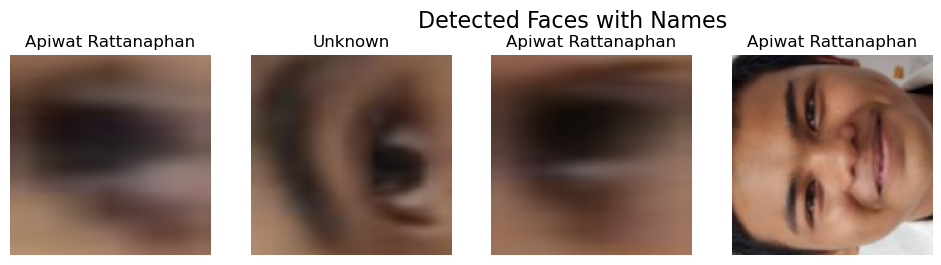

In [10]:
from facenet_pytorch import InceptionResnetV1
import torch
import cv2
import numpy as np
import os
from ultralytics import YOLO  # Import YOLO from ultralytics
from PIL import Image
import matplotlib.pyplot as plt

# Determine if an NVIDIA GPU is available
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Load FaceNet model
model = InceptionResnetV1(pretrained='vggface2').eval().to(device)

# Load known face embeddings
known_faces_file = r'D:\Friend\Super AI\V89\My Project\facenet-pytorch-master\examples\embeddings_with_names.pt'
known_faces_data = torch.load(known_faces_file)

# Extract embeddings and names
known_face_embeddings = []
known_face_names = []
for name, embedding in known_faces_data.items():
    known_face_names.append(name)
    known_face_embeddings.append(embedding)

# Convert known_face_embeddings to a tensor
known_face_embeddings = torch.stack(known_face_embeddings).to(device)

# Load YOLOv8 model for face detection
yolo_model = YOLO('yolov10s.pt')  # Load YOLO model (you can choose 'yolov8n' or another variant)

# Function to recognize faces
def recognize_face(embedding, known_face_embeddings, known_face_names, threshold=1.0):
    distances = [torch.norm(embedding - known_face_embedding).item() for known_face_embedding in known_face_embeddings]
    min_distance_index = np.argmin(distances)
    if distances[min_distance_index] < threshold:
        return known_face_names[min_distance_index]
    return "Unknown"

# Path to image directory
image_directory = r'D:\Friend\Super AI\V89\My Project\facenet-pytorch-master\data\test_images_cropped'
image_files = [os.path.join(image_directory, f) for f in os.listdir(image_directory) if f.endswith('.jpg')]

# Variables for tracking accuracy
total_faces = 0
correct_recognitions = 0
detected_faces = []

# Process each image
for image_path in image_files:
    image = Image.open(image_path).convert("RGB")
    image_rgb = np.array(image)

    # Use YOLO to detect faces
    results = yolo_model(image_rgb)
    boxes = results[0].boxes.xyxy.cpu().numpy() if results[0].boxes is not None else []

    # Process each detected face
    for box in boxes:
        box = box.astype(int)

        # Ensure the box coordinates are within the image boundaries
        box[0] = max(0, box[0])
        box[1] = max(0, box[1])
        box[2] = min(image_rgb.shape[1], box[2])
        box[3] = min(image_rgb.shape[0], box[3])

        # Extract face region
        face_region = image_rgb[box[1]:box[3], box[0]:box[2]]

        # Ensure the face region is not empty
        if face_region.size == 0:
            continue

        # Resize face region to 160x160 for FaceNet
        face_region_resized = cv2.resize(face_region, (160, 160))
        face_tensor = torch.tensor(face_region_resized).permute(2, 0, 1).float().unsqueeze(0).to(device) / 255.0

        # Generate embedding using FaceNet
        with torch.no_grad():
            embedding = model(face_tensor).cpu()

        # Recognize face
        identity = recognize_face(embedding, known_face_embeddings, known_face_names)

        # Display results
        print(f"Image: {os.path.basename(image_path)}, Identified: {identity}")

        # Update accuracy
        total_faces += 1
        if identity != "Unknown":
            correct_recognitions += 1

        # Store detected face and identity for plotting
        detected_faces.append((face_region_resized, identity))

# Plot accuracy
if total_faces > 0:
    accuracy = correct_recognitions / total_faces
    print(f"Overall Accuracy: {accuracy * 100:.2f}%")

    # Plotting detected faces and their labels
    num_faces = len(detected_faces)
    cols = 5
    rows = (num_faces // cols) + 1
    plt.figure(figsize=(15, 3 * rows))

    for i, (face, identity) in enumerate(detected_faces):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(face)
        plt.title(identity)
        plt.axis('off')

    plt.suptitle('Detected Faces with Names', size=16)
    plt.show()

else:
    print("No faces detected in any of the images.")



0: 640x640 (no detections), 1014.9ms
Speed: 7.0ms preprocess, 1014.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 1028.0ms
Speed: 6.0ms preprocess, 1028.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 987.1ms
Speed: 5.0ms preprocess, 987.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 1024.0ms
Speed: 8.0ms preprocess, 1024.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 car, 1117.0ms
Speed: 6.0ms preprocess, 1117.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Image: 2 (1).jpg, Identified: Apiwat Rattanaphan

0: 640x640 (no detections), 1002.0ms
Speed: 7.0ms preprocess, 1002.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 1235.5ms
Speed: 7.0ms preprocess, 1235.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Over

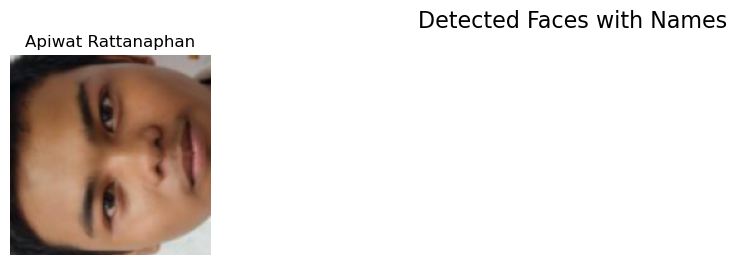

In [11]:
from facenet_pytorch import InceptionResnetV1
import torch
import cv2
import numpy as np
import os
from ultralytics import YOLO  # Import YOLO from ultralytics
from PIL import Image
import matplotlib.pyplot as plt

# Determine if an NVIDIA GPU is available
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Load FaceNet model
model = InceptionResnetV1(pretrained='vggface2').eval().to(device)

# Load known face embeddings
known_faces_file = r'D:\Friend\Super AI\V89\My Project\facenet-pytorch-master\examples\embeddings_with_names.pt'
known_faces_data = torch.load(known_faces_file)

# Extract embeddings and names
known_face_embeddings = []
known_face_names = []
for name, embedding in known_faces_data.items():
    known_face_names.append(name)
    known_face_embeddings.append(embedding)

# Convert known_face_embeddings to a tensor
known_face_embeddings = torch.stack(known_face_embeddings).to(device)

# Load YOLOv8 model for face detection
yolo_model = YOLO('yolov10m.pt')  # Load YOLO model (you can choose 'yolov8n' or another variant)

# Function to recognize faces
def recognize_face(embedding, known_face_embeddings, known_face_names, threshold=1.0):
    distances = [torch.norm(embedding - known_face_embedding).item() for known_face_embedding in known_face_embeddings]
    min_distance_index = np.argmin(distances)
    if distances[min_distance_index] < threshold:
        return known_face_names[min_distance_index]
    return "Unknown"

# Path to image directory
image_directory = r'D:\Friend\Super AI\V89\My Project\facenet-pytorch-master\data\test_images_cropped'
image_files = [os.path.join(image_directory, f) for f in os.listdir(image_directory) if f.endswith('.jpg')]

# Variables for tracking accuracy
total_faces = 0
correct_recognitions = 0
detected_faces = []

# Process each image
for image_path in image_files:
    image = Image.open(image_path).convert("RGB")
    image_rgb = np.array(image)

    # Use YOLO to detect faces
    results = yolo_model(image_rgb)
    boxes = results[0].boxes.xyxy.cpu().numpy() if results[0].boxes is not None else []

    # Process each detected face
    for box in boxes:
        box = box.astype(int)

        # Ensure the box coordinates are within the image boundaries
        box[0] = max(0, box[0])
        box[1] = max(0, box[1])
        box[2] = min(image_rgb.shape[1], box[2])
        box[3] = min(image_rgb.shape[0], box[3])

        # Extract face region
        face_region = image_rgb[box[1]:box[3], box[0]:box[2]]

        # Ensure the face region is not empty
        if face_region.size == 0:
            continue

        # Resize face region to 160x160 for FaceNet
        face_region_resized = cv2.resize(face_region, (160, 160))
        face_tensor = torch.tensor(face_region_resized).permute(2, 0, 1).float().unsqueeze(0).to(device) / 255.0

        # Generate embedding using FaceNet
        with torch.no_grad():
            embedding = model(face_tensor).cpu()

        # Recognize face
        identity = recognize_face(embedding, known_face_embeddings, known_face_names)

        # Display results
        print(f"Image: {os.path.basename(image_path)}, Identified: {identity}")

        # Update accuracy
        total_faces += 1
        if identity != "Unknown":
            correct_recognitions += 1

        # Store detected face and identity for plotting
        detected_faces.append((face_region_resized, identity))

# Plot accuracy
if total_faces > 0:
    accuracy = correct_recognitions / total_faces
    print(f"Overall Accuracy: {accuracy * 100:.2f}%")

    # Plotting detected faces and their labels
    num_faces = len(detected_faces)
    cols = 5
    rows = (num_faces // cols) + 1
    plt.figure(figsize=(15, 3 * rows))

    for i, (face, identity) in enumerate(detected_faces):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(face)
        plt.title(identity)
        plt.axis('off')

    plt.suptitle('Detected Faces with Names', size=16)
    plt.show()

else:
    print("No faces detected in any of the images.")


100%|██████████| 39.1M/39.1M [00:35<00:00, 1.14MB/s]



0: 640x640 1 person, 1261.0ms
Speed: 8.0ms preprocess, 1261.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Image: 10.jpg, Identified: Unknown

0: 640x640 (no detections), 1061.7ms
Speed: 6.6ms preprocess, 1061.7ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 1083.0ms
Speed: 5.0ms preprocess, 1083.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 1170.9ms
Speed: 78.0ms preprocess, 1170.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 969.0ms
Speed: 6.0ms preprocess, 969.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 983.9ms
Speed: 6.0ms preprocess, 983.9ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Image: 2 (2).jpg, Identified: Apiwat Rattanaphan

0: 640x640 (no detections), 1031.0ms
Speed: 5.0ms preprocess, 1031.0ms inference, 2.0ms postprocess per image 

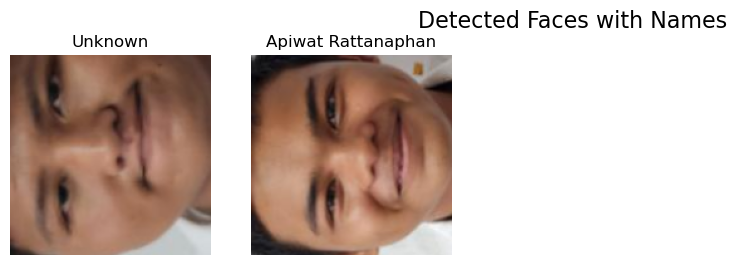

In [16]:
from facenet_pytorch import InceptionResnetV1
import torch
import cv2
import numpy as np
import os
from ultralytics import YOLO  # Import YOLO from ultralytics
from PIL import Image
import matplotlib.pyplot as plt

# Determine if an NVIDIA GPU is available
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Load FaceNet model
model = InceptionResnetV1(pretrained='vggface2').eval().to(device)

# Load known face embeddings
known_faces_file = r'D:\Friend\Super AI\V89\My Project\facenet-pytorch-master\examples\embeddings_with_names.pt'
known_faces_data = torch.load(known_faces_file)

# Extract embeddings and names
known_face_embeddings = []
known_face_names = []
for name, embedding in known_faces_data.items():
    known_face_names.append(name)
    known_face_embeddings.append(embedding)

# Convert known_face_embeddings to a tensor
known_face_embeddings = torch.stack(known_face_embeddings).to(device)

# Load YOLOv8 model for face detection
yolo_model = YOLO('yolov9m.pt')  # Load YOLO model (you can choose 'yolov8n' or another variant)

# Function to recognize faces
def recognize_face(embedding, known_face_embeddings, known_face_names, threshold=1.0):
    distances = [torch.norm(embedding - known_face_embedding).item() for known_face_embedding in known_face_embeddings]
    min_distance_index = np.argmin(distances)
    if distances[min_distance_index] < threshold:
        return known_face_names[min_distance_index]
    return "Unknown"

# Path to image directory
image_directory = r'D:\Friend\Super AI\V89\My Project\facenet-pytorch-master\data\test_images_cropped'
image_files = [os.path.join(image_directory, f) for f in os.listdir(image_directory) if f.endswith('.jpg')]

# Variables for tracking accuracy
total_faces = 0
correct_recognitions = 0
detected_faces = []

# Process each image
for image_path in image_files:
    image = Image.open(image_path).convert("RGB")
    image_rgb = np.array(image)

    # Use YOLO to detect faces
    results = yolo_model(image_rgb)
    boxes = results[0].boxes.xyxy.cpu().numpy() if results[0].boxes is not None else []

    # Process each detected face
    for box in boxes:
        box = box.astype(int)

        # Ensure the box coordinates are within the image boundaries
        box[0] = max(0, box[0])
        box[1] = max(0, box[1])
        box[2] = min(image_rgb.shape[1], box[2])
        box[3] = min(image_rgb.shape[0], box[3])

        # Extract face region
        face_region = image_rgb[box[1]:box[3], box[0]:box[2]]

        # Ensure the face region is not empty
        if face_region.size == 0:
            continue

        # Resize face region to 160x160 for FaceNet
        face_region_resized = cv2.resize(face_region, (160, 160))
        face_tensor = torch.tensor(face_region_resized).permute(2, 0, 1).float().unsqueeze(0).to(device) / 255.0

        # Generate embedding using FaceNet
        with torch.no_grad():
            embedding = model(face_tensor).cpu()

        # Recognize face
        identity = recognize_face(embedding, known_face_embeddings, known_face_names)

        # Display results
        print(f"Image: {os.path.basename(image_path)}, Identified: {identity}")

        # Update accuracy
        total_faces += 1
        if identity != "Unknown":
            correct_recognitions += 1

        # Store detected face and identity for plotting
        detected_faces.append((face_region_resized, identity))

# Plot accuracy
if total_faces > 0:
    accuracy = correct_recognitions / total_faces
    print(f"Overall Accuracy: {accuracy * 100:.2f}%")

    # Plotting detected faces and their labels
    num_faces = len(detected_faces)
    cols = 5
    rows = (num_faces // cols) + 1
    plt.figure(figsize=(15, 3 * rows))

    for i, (face, identity) in enumerate(detected_faces):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(face)
        plt.title(identity)
        plt.axis('off')

    plt.suptitle('Detected Faces with Names', size=16)
    plt.show()

else:
    print("No faces detected in any of the images.")


In [12]:
pip install dlib


Note: you may need to restart the kernel to use updated packages.


Image: rotated_left_5_degrees_2_jpg.rf.4403551b984ff18785d90e8f6ca1689e.jpg, Identified: Thanaphum Hengarun
Image: rotated_right_5_degrees_10_jpg.rf.467ed5bcdc6eaa22c57e9ad57e105292.jpg, Identified: Thanapon Phetprapai
Overall Accuracy: 100.00%


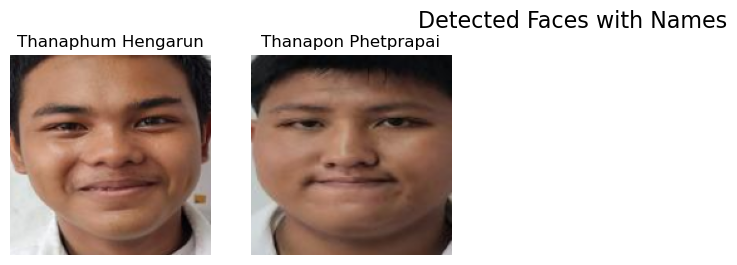

In [15]:
import torch
import cv2
import numpy as np
import os
import dlib  # Import dlib for face detection
from facenet_pytorch import InceptionResnetV1
from PIL import Image
import matplotlib.pyplot as plt

# Determine if an NVIDIA GPU is available
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Load FaceNet model
model = InceptionResnetV1(pretrained='vggface2').eval().to(device)

# Load known face embeddings
known_faces_file = r'D:\Friend\Super AI\V89\My Project\facenet-pytorch-master\examples\embeddings_with_names.pt'
known_faces_data = torch.load(known_faces_file)

# Extract embeddings and names
known_face_embeddings = []
known_face_names = []
for name, embedding in known_faces_data.items():
    known_face_names.append(name)
    known_face_embeddings.append(embedding)

# Convert known_face_embeddings to a tensor
known_face_embeddings = torch.stack(known_face_embeddings).to(device)

# Load dlib face detector
face_detector = dlib.get_frontal_face_detector()

# Function to recognize faces
def recognize_face(embedding, known_face_embeddings, known_face_names, threshold=1.0):
    distances = [torch.norm(embedding - known_face_embedding).item() for known_face_embedding in known_face_embeddings]
    min_distance_index = np.argmin(distances)
    if distances[min_distance_index] < threshold:
        return known_face_names[min_distance_index]
    return "Unknown"

# Path to image directory
image_directory = r'D:\Friend\Super AI\V89\My Project\facenet-pytorch-master\data\test'
image_files = [os.path.join(image_directory, f) for f in os.listdir(image_directory) if f.endswith('.jpg')]

# Variables for tracking accuracy
total_faces = 0
correct_recognitions = 0
detected_faces = []

# Process each image
for image_path in image_files:
    image = Image.open(image_path).convert("RGB")
    image_rgb = np.array(image)

    # Use dlib to detect faces
    detections = face_detector(image_rgb, 1)

    # Process each detected face
    for d in detections:
        x1, y1, x2, y2 = d.left(), d.top(), d.right(), d.bottom()

        # Ensure the box coordinates are within the image boundaries
        x1 = max(0, x1)
        y1 = max(0, y1)
        x2 = min(image_rgb.shape[1], x2)
        y2 = min(image_rgb.shape[0], y2)

        # Extract face region
        face_region = image_rgb[y1:y2, x1:x2]

        # Ensure the face region is not empty
        if face_region.size == 0:
            continue

        # Resize face region to 160x160 for FaceNet
        face_region_resized = cv2.resize(face_region, (160, 160))
        face_tensor = torch.tensor(face_region_resized).permute(2, 0, 1).float().unsqueeze(0).to(device) / 255.0

        # Generate embedding using FaceNet
        with torch.no_grad():
            embedding = model(face_tensor).cpu()

        # Recognize face
        identity = recognize_face(embedding, known_face_embeddings, known_face_names)

        # Display results
        print(f"Image: {os.path.basename(image_path)}, Identified: {identity}")

        # Update accuracy
        total_faces += 1
        if identity != "Unknown":
            correct_recognitions += 1

        # Store detected face and identity for plotting
        detected_faces.append((face_region_resized, identity))

# Plot accuracy
if total_faces > 0:
    accuracy = correct_recognitions / total_faces
    print(f"Overall Accuracy: {accuracy * 100:.2f}%")

    # Plotting detected faces and their labels
    num_faces = len(detected_faces)
    cols = 5
    rows = (num_faces // cols) + 1
    plt.figure(figsize=(15, 3 * rows))

    for i, (face, identity) in enumerate(detected_faces):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(face)
        plt.title(identity)
        plt.axis('off')

    plt.suptitle('Detected Faces with Names', size=16)
    plt.show()

else:
    print("No faces detected in any of the images.")



Evaluating MTCNN...


100%|██████████| 6/6 [00:00<00:00,  7.54it/s]



Evaluating YOLOv8m...


  0%|          | 0/6 [00:00<?, ?it/s]


0: 640x640 1 person, 1 kite, 983.6ms
Speed: 6.0ms preprocess, 983.6ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


 17%|█▋        | 1/6 [00:03<00:17,  3.49s/it]


0: 640x640 1 person, 901.0ms
Speed: 8.0ms preprocess, 901.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


 33%|███▎      | 2/6 [00:04<00:07,  1.98s/it]


0: 640x640 1 person, 1 refrigerator, 1061.0ms
Speed: 11.0ms preprocess, 1061.0ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)


 50%|█████     | 3/6 [00:05<00:04,  1.58s/it]


0: 640x640 1 person, 965.8ms
Speed: 68.0ms preprocess, 965.8ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


 67%|██████▋   | 4/6 [00:06<00:02,  1.37s/it]


0: 640x640 1 person, 1 tv, 1 refrigerator, 939.0ms
Speed: 6.0ms preprocess, 939.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


100%|██████████| 6/6 [00:07<00:00,  1.26s/it]



Evaluating YOLOv9m...


  0%|          | 0/6 [00:00<?, ?it/s]


0: 640x640 1 person, 1862.0ms
Speed: 8.0ms preprocess, 1862.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


 17%|█▋        | 1/6 [00:04<00:23,  4.65s/it]


0: 640x640 1 person, 1994.6ms
Speed: 9.0ms preprocess, 1994.6ms inference, 18.0ms postprocess per image at shape (1, 3, 640, 640)


 33%|███▎      | 2/6 [00:06<00:12,  3.12s/it]


0: 640x640 1 person, 1543.4ms
Speed: 11.0ms preprocess, 1543.4ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


 50%|█████     | 3/6 [00:08<00:07,  2.42s/it]


0: 640x640 1 person, 1105.0ms
Speed: 9.0ms preprocess, 1105.0ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)


 67%|██████▋   | 4/6 [00:09<00:03,  1.91s/it]


0: 640x640 1 person, 1346.9ms
Speed: 29.0ms preprocess, 1346.9ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)


100%|██████████| 6/6 [00:10<00:00,  1.80s/it]



Evaluating YOLOv10m...


  0%|          | 0/6 [00:00<?, ?it/s]


0: 640x640 1 person, 1065.0ms
Speed: 7.0ms preprocess, 1065.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 17%|█▋        | 1/6 [00:03<00:17,  3.51s/it]


0: 640x640 1 person, 1271.4ms
Speed: 6.0ms preprocess, 1271.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 33%|███▎      | 2/6 [00:04<00:08,  2.21s/it]


0: 640x640 1 person, 903.0ms
Speed: 5.0ms preprocess, 903.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 50%|█████     | 3/6 [00:05<00:04,  1.62s/it]


0: 640x640 1 person, 924.1ms
Speed: 5.0ms preprocess, 924.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 67%|██████▋   | 4/6 [00:06<00:02,  1.35s/it]


0: 640x640 1 person, 957.0ms
Speed: 6.0ms preprocess, 957.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


100%|██████████| 6/6 [00:07<00:00,  1.27s/it]


Model Performance Comparison:
model_name  avg_inference_time  max_memory_usage  faces_detected      fps
     MTCNN            0.148803        647.312500             1.0 6.720284
   YOLOv8m            1.497292        846.539062             1.8 0.667872
   YOLOv9m            2.149896        984.085938             1.0 0.465139
  YOLOv10m            1.519455       1028.632812             1.0 0.658131

Results saved to 'model_performance_results.csv'



C:\Users\HP\AppData\Local\Temp\ipykernel_13820\1561399011.py:104: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')



Plots saved as 'model_performance_comparison.png'
Radar plot saved as 'model_performance_radar.png'


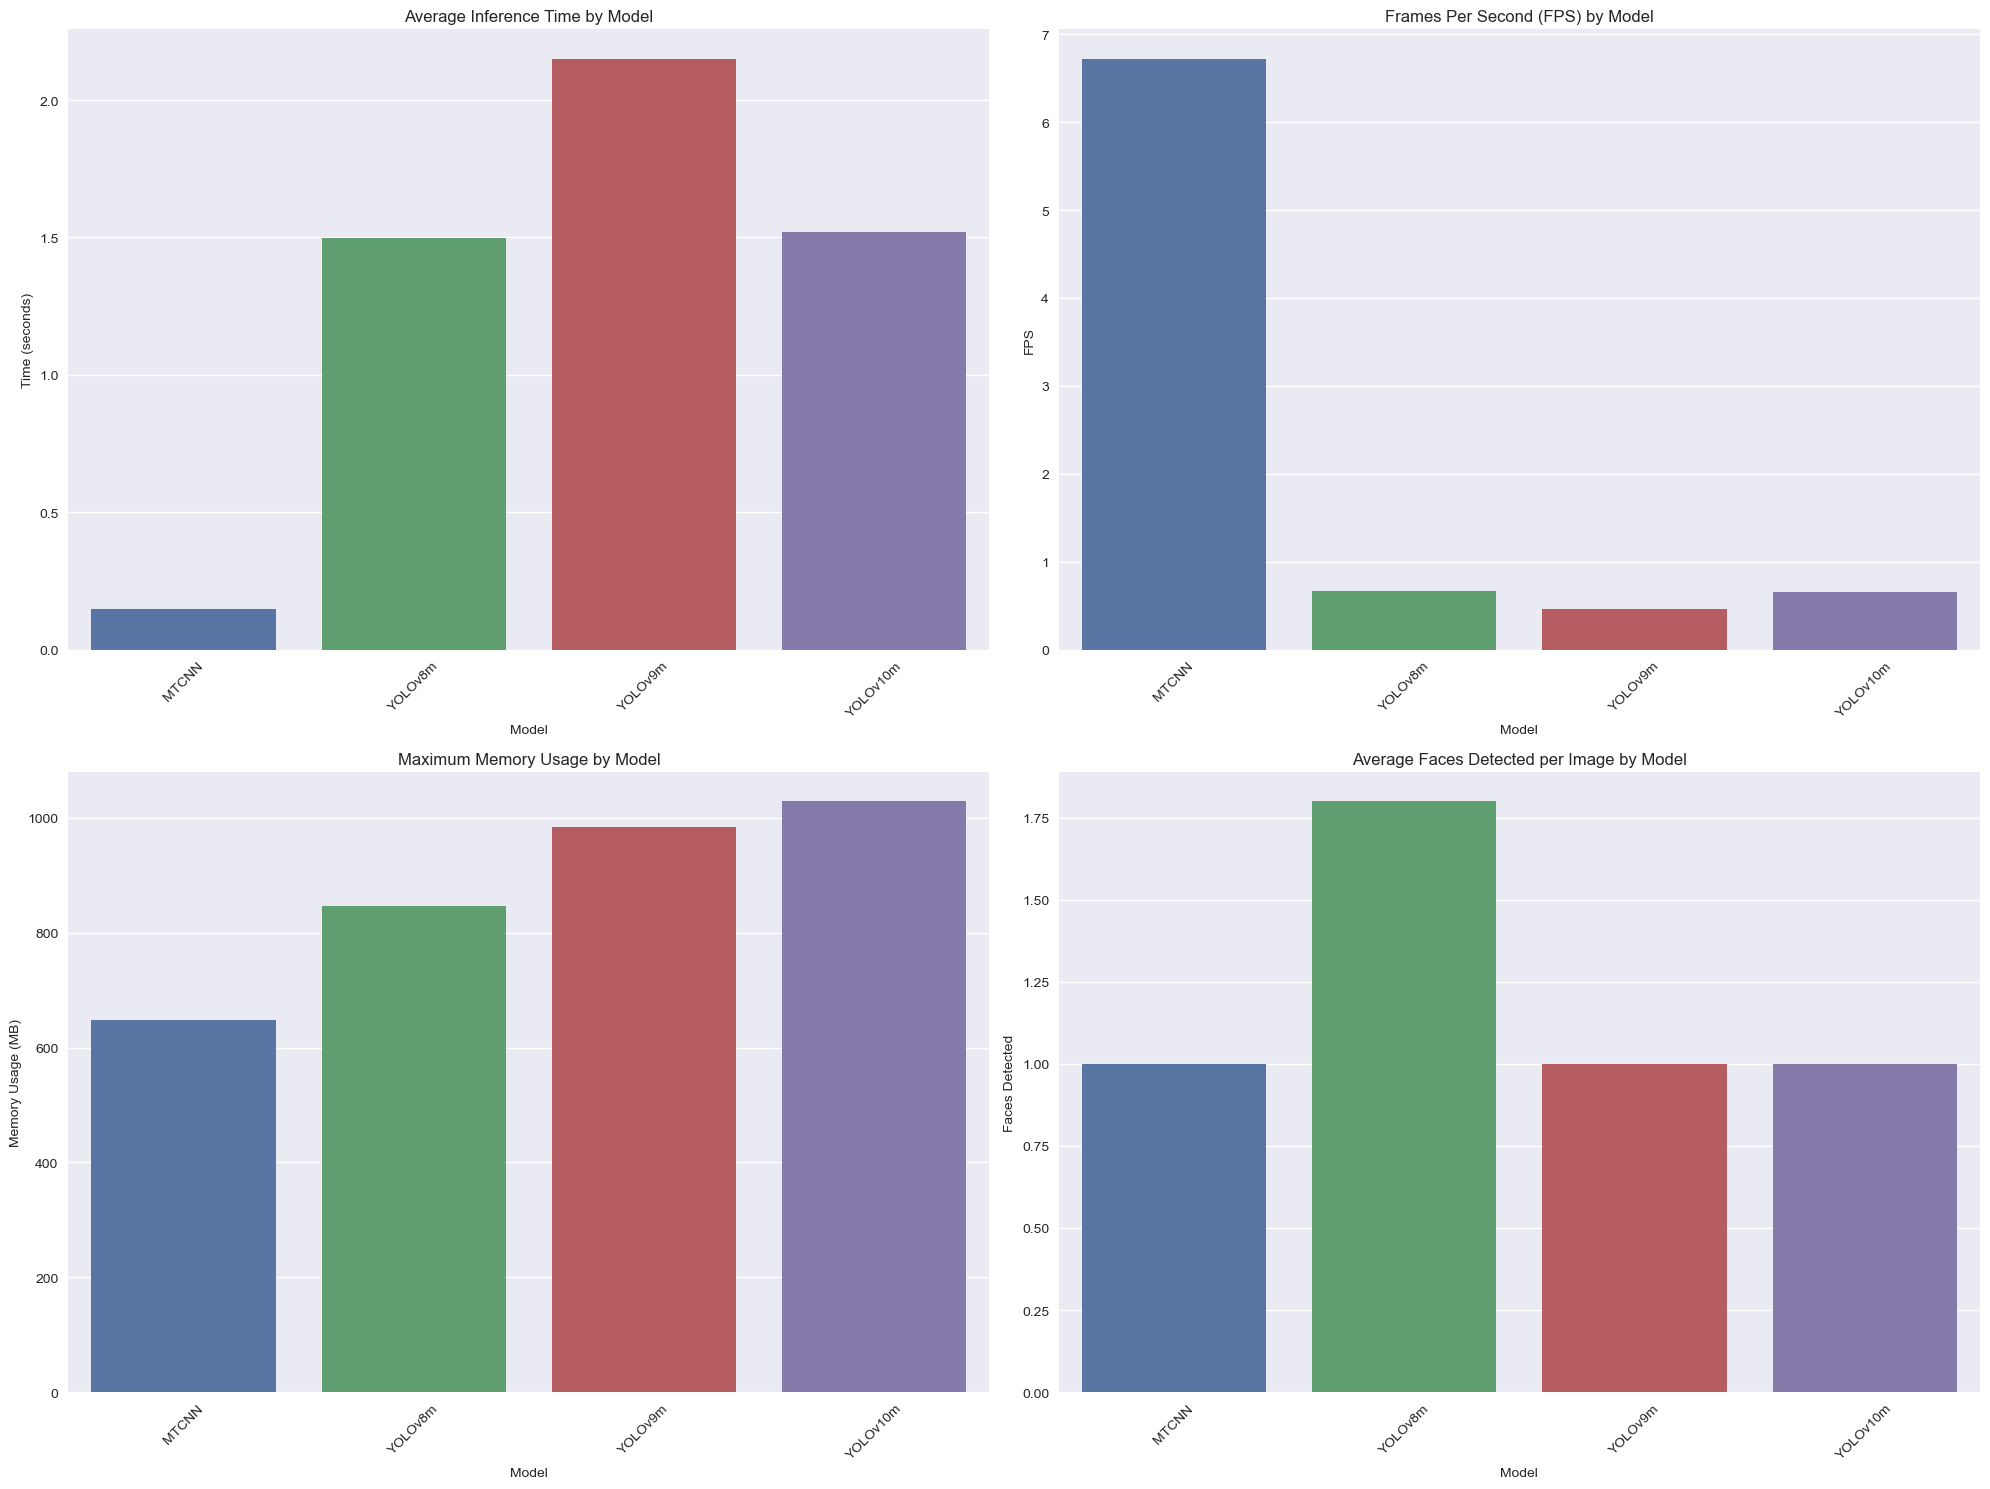

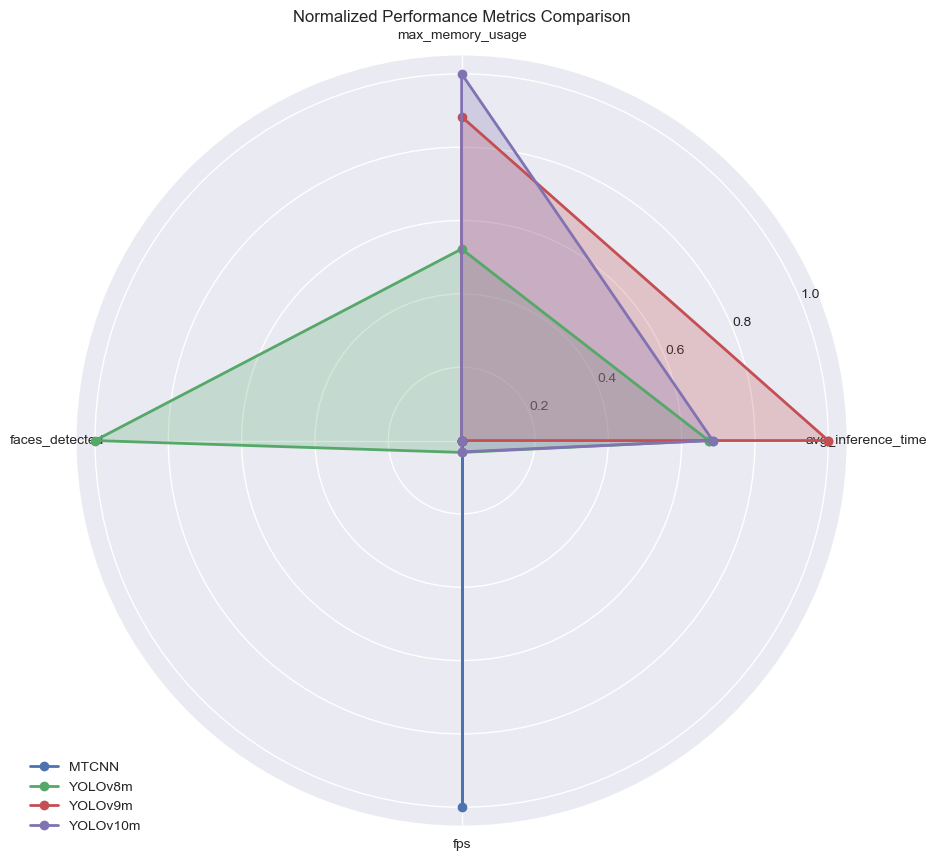

In [22]:
import torch
import time
from facenet_pytorch import InceptionResnetV1, MTCNN
from PIL import Image
import numpy as np
import cv2
from ultralytics import YOLO
import os
import psutil
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

class ModelPerformanceEvaluator:
    def __init__(self, test_images_dir):
        self.device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
        self.test_images_dir = test_images_dir
        self.models = {
            'MTCNN': self.load_mtcnn_model,
            'YOLOv8m': lambda: self.load_yolo_model('yolov8m.pt'),
            'YOLOv9m': lambda: self.load_yolo_model('yolov9m.pt'),
            'YOLOv10m': lambda: self.load_yolo_model('yolov10m.pt')
        }
        self.results = {
            'model_name': [],
            'avg_inference_time': [],
            'max_memory_usage': [],
            'faces_detected': [],
            'fps': []
        }

    def load_mtcnn_model(self):
        return MTCNN(keep_all=True, device=self.device)

    def load_yolo_model(self, model_path):
        return YOLO(model_path)

    def get_memory_usage(self):
        process = psutil.Process(os.getpid())
        return process.memory_info().rss / 1024 / 1024  # Convert to MB

    def detect_faces_mtcnn(self, model, image):
        boxes, _ = model.detect(image)
        return boxes if boxes is not None else np.array([])

    def detect_faces_yolo(self, model, image):
        results = model(image)
        return results[0].boxes.xyxy.cpu().numpy()

    def evaluate_model(self, model_name):
        print(f"\nEvaluating {model_name}...")
        model = self.models[model_name]()
        
        inference_times = []
        max_memory = 0
        total_faces = 0
        total_images = 0

        # Process each image in the test directory
        for img_name in tqdm(os.listdir(self.test_images_dir)):
            if not img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                continue

            img_path = os.path.join(self.test_images_dir, img_name)
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Measure inference time
            start_time = time.time()
            if model_name == 'MTCNN':
                boxes = self.detect_faces_mtcnn(model, image)
            else:
                boxes = self.detect_faces_yolo(model, image)
            inference_time = time.time() - start_time

            # Update metrics
            inference_times.append(inference_time)
            current_memory = self.get_memory_usage()
            max_memory = max(max_memory, current_memory)
            total_faces += len(boxes)
            total_images += 1

        # Calculate metrics
        avg_inference_time = np.mean(inference_times)
        fps = 1.0 / avg_inference_time
        avg_faces_per_image = total_faces / total_images

        # Store results
        self.results['model_name'].append(model_name)
        self.results['avg_inference_time'].append(avg_inference_time)
        self.results['max_memory_usage'].append(max_memory)
        self.results['faces_detected'].append(avg_faces_per_image)
        self.results['fps'].append(fps)

    def evaluate_all_models(self):
        for model_name in self.models.keys():
            self.evaluate_model(model_name)

    def plot_results(self):
        df = pd.DataFrame(self.results)
        
        # Set style for all plots
        plt.style.use('seaborn')
        
        # Create a figure with subplots
        fig = plt.figure(figsize=(20, 15))
        
        # 1. Bar plot for Average Inference Time
        plt.subplot(2, 2, 1)
        sns.barplot(data=df, x='model_name', y='avg_inference_time')
        plt.title('Average Inference Time by Model')
        plt.xlabel('Model')
        plt.ylabel('Time (seconds)')
        plt.xticks(rotation=45)
        
        # 2. Bar plot for FPS
        plt.subplot(2, 2, 2)
        sns.barplot(data=df, x='model_name', y='fps')
        plt.title('Frames Per Second (FPS) by Model')
        plt.xlabel('Model')
        plt.ylabel('FPS')
        plt.xticks(rotation=45)
        
        # 3. Bar plot for Memory Usage
        plt.subplot(2, 2, 3)
        sns.barplot(data=df, x='model_name', y='max_memory_usage')
        plt.title('Maximum Memory Usage by Model')
        plt.xlabel('Model')
        plt.ylabel('Memory Usage (MB)')
        plt.xticks(rotation=45)
        
        # 4. Bar plot for Faces Detected
        plt.subplot(2, 2, 4)
        sns.barplot(data=df, x='model_name', y='faces_detected')
        plt.title('Average Faces Detected per Image by Model')
        plt.xlabel('Model')
        plt.ylabel('Faces Detected')
        plt.xticks(rotation=45)
        
        # Adjust layout and save
        plt.tight_layout()
        plt.savefig('model_performance_comparison.png')
        print("\nPlots saved as 'model_performance_comparison.png'")
        
        # Create a radar chart for overall comparison
        plt.figure(figsize=(10, 10))
        
        # Normalize the metrics for radar chart
        metrics = ['avg_inference_time', 'max_memory_usage', 'faces_detected', 'fps']
        df_normalized = df.copy()
        for metric in metrics:
            df_normalized[metric] = (df[metric] - df[metric].min()) / (df[metric].max() - df[metric].min())
        
        # Prepare the radar chart
        angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False)
        angles = np.concatenate((angles, [angles[0]]))  # complete the circle
        
        ax = plt.subplot(111, projection='polar')
        for idx, model in enumerate(df['model_name']):
            values = df_normalized.loc[idx, metrics].values
            values = np.concatenate((values, [values[0]]))
            ax.plot(angles, values, 'o-', linewidth=2, label=model)
            ax.fill(angles, values, alpha=0.25)
        
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(metrics)
        ax.set_title('Normalized Performance Metrics Comparison')
        plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
        
        plt.savefig('model_performance_radar.png')
        print("Radar plot saved as 'model_performance_radar.png'")

    def display_results(self):
        df = pd.DataFrame(self.results)
        print("\nModel Performance Comparison:")
        print(df.to_string(index=False))
        
        # Save results to CSV
        df.to_csv('model_performance_results.csv', index=False)
        print("\nResults saved to 'model_performance_results.csv'")
        
        # Generate plots
        self.plot_results()

def main():
    # Set your test images directory
    test_images_dir = r"D:\Friend\Super AI\V89\My Project\facenet-pytorch-master\data\test"
    
    # Initialize evaluator
    evaluator = ModelPerformanceEvaluator(test_images_dir)
    
    # Run evaluation
    evaluator.evaluate_all_models()
    
    # Display results and generate plots
    evaluator.display_results()

if __name__ == "__main__":
    main()